## Single Fully-Connected Neural Layer

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
# 784 -> 32; Compression factor = 24.5
encoding_dim = 32

input_img = Input(shape=(784, ))

encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)

In [0]:
autoencoder = Model(input_img, decoded)

# Encoder Model
encoder = Model(input_img, encoded)

# Decoder Model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
history = autoencoder.fit(x_train, x_train, epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.3649 - val_loss: 0.2716
Epoch 2/50
 - 2s - loss: 0.2646 - val_loss: 0.2535
Epoch 3/50
 - 2s - loss: 0.2424 - val_loss: 0.2292
Epoch 4/50
 - 2s - loss: 0.2216 - val_loss: 0.2117
Epoch 5/50
 - 2s - loss: 0.2068 - val_loss: 0.1995
Epoch 6/50
 - 2s - loss: 0.1961 - val_loss: 0.1903
Epoch 7/50
 - 2s - loss: 0.1879 - val_loss: 0.1832
Epoch 8/50
 - 2s - loss: 0.1812 - val_loss: 0.1768
Epoch 9/50
 - 2s - loss: 0.1753 - val_loss: 0.1714
Epoch 10/50
 - 1s - loss: 0.1703 - val_loss: 0.1666
Epoch 11/50
 - 2s - loss: 0.1658 - val_loss: 0.1623
Epoch 12/50
 - 1s - loss: 0.1616 - val_loss: 0.1583
Epoch 13/50
 - 2s - loss: 0.1577 - val_loss: 0.1544
Epoch 14/50
 - 1s - loss: 0.1540 - val_loss: 0.1509
Epoch 15/50
 - 1s - loss: 0.1506 - val_loss: 0.1477
Epoch 16/50
 - 2s - loss: 0.1475 - val_loss: 0.1446
Epoch 17/50
 - 2s - loss: 0.1446 - val_loss: 0.1419
Epoch 18/50
 - 2s - loss: 0.1420 - val_loss: 0.1394
Epoch 19/50
 - 2s - los

 - 2s - loss: 0.1093 - val_loss: 0.1075
Epoch 44/50
 - 2s - loss: 0.1089 - val_loss: 0.1071
Epoch 45/50
 - 2s - loss: 0.1084 - val_loss: 0.1066
Epoch 46/50
 - 2s - loss: 0.1080 - val_loss: 0.1062
Epoch 47/50
 - 2s - loss: 0.1076 - val_loss: 0.1059
Epoch 48/50
 - 2s - loss: 0.1072 - val_loss: 0.1055
Epoch 49/50
 - 2s - loss: 0.1069 - val_loss: 0.1052
Epoch 50/50
 - 1s - loss: 0.1066 - val_loss: 0.1048


Text(0.5,1,'Loss Curves')

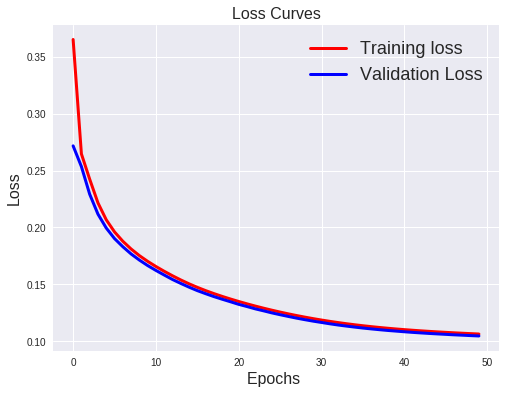

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

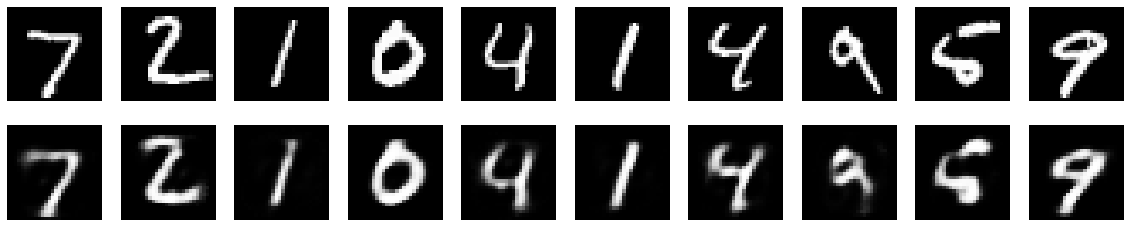

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Deep Autoencoder

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(encoded)
encoded = Dense(32, activation="relu")(encoded)

decoded = Dense(64, activation="relu")(encoded)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(784, activation="sigmoid")(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")
history2 = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 0.3354 - val_loss: 0.2642
Epoch 2/100
 - 2s - loss: 0.2580 - val_loss: 0.2537
Epoch 3/100
 - 2s - loss: 0.2449 - val_loss: 0.2345
Epoch 4/100
 - 2s - loss: 0.2265 - val_loss: 0.2207
Epoch 5/100
 - 2s - loss: 0.2143 - val_loss: 0.2057
Epoch 6/100
 - 2s - loss: 0.1989 - val_loss: 0.1913
Epoch 7/100
 - 2s - loss: 0.1878 - val_loss: 0.1815
Epoch 8/100
 - 2s - loss: 0.1794 - val_loss: 0.1761
Epoch 9/100
 - 2s - loss: 0.1717 - val_loss: 0.1669
Epoch 10/100
 - 2s - loss: 0.1659 - val_loss: 0.1624
Epoch 11/100
 - 2s - loss: 0.1607 - val_loss: 0.1555
Epoch 12/100
 - 2s - loss: 0.1565 - val_loss: 0.1541
Epoch 13/100
 - 2s - loss: 0.1529 - val_loss: 0.1491
Epoch 14/100
 - 2s - loss: 0.1502 - val_loss: 0.1468
Epoch 15/100
 - 2s - loss: 0.1481 - val_loss: 0.1455
Epoch 16/100
 - 2s - loss: 0.1462 - val_loss: 0.1424
Epoch 17/100
 - 2s - loss: 0.1444 - val_loss: 0.1421
Epoch 18/100
 - 2s - loss: 0.1427 - val_loss: 0.1415
Epoch

 - 2s - loss: 0.1153 - val_loss: 0.1125
Epoch 44/100
 - 2s - loss: 0.1148 - val_loss: 0.1132
Epoch 45/100
 - 2s - loss: 0.1141 - val_loss: 0.1133
Epoch 46/100
 - 2s - loss: 0.1136 - val_loss: 0.1132
Epoch 47/100
 - 2s - loss: 0.1130 - val_loss: 0.1122
Epoch 48/100
 - 2s - loss: 0.1125 - val_loss: 0.1096
Epoch 49/100
 - 2s - loss: 0.1121 - val_loss: 0.1120
Epoch 50/100
 - 2s - loss: 0.1117 - val_loss: 0.1089
Epoch 51/100
 - 2s - loss: 0.1112 - val_loss: 0.1104
Epoch 52/100
 - 2s - loss: 0.1110 - val_loss: 0.1113
Epoch 53/100
 - 2s - loss: 0.1105 - val_loss: 0.1097
Epoch 54/100
 - 2s - loss: 0.1103 - val_loss: 0.1074
Epoch 55/100
 - 2s - loss: 0.1098 - val_loss: 0.1093
Epoch 56/100
 - 2s - loss: 0.1095 - val_loss: 0.1079
Epoch 57/100
 - 2s - loss: 0.1091 - val_loss: 0.1094
Epoch 58/100
 - 2s - loss: 0.1089 - val_loss: 0.1072
Epoch 59/100
 - 2s - loss: 0.1085 - val_loss: 0.1060
Epoch 60/100
 - 2s - loss: 0.1081 - val_loss: 0.1071
Epoch 61/100
 - 2s - loss: 0.1078 - val_loss: 0.1059
Epoch 

 - 2s - loss: 0.1022 - val_loss: 0.1015
Epoch 87/100
 - 2s - loss: 0.1020 - val_loss: 0.1007
Epoch 88/100
 - 2s - loss: 0.1018 - val_loss: 0.1006
Epoch 89/100
 - 2s - loss: 0.1017 - val_loss: 0.1004
Epoch 90/100
 - 2s - loss: 0.1014 - val_loss: 0.1002
Epoch 91/100
 - 2s - loss: 0.1013 - val_loss: 0.1020
Epoch 92/100
 - 2s - loss: 0.1011 - val_loss: 0.1012
Epoch 93/100
 - 2s - loss: 0.1010 - val_loss: 0.0992
Epoch 94/100
 - 2s - loss: 0.1007 - val_loss: 0.0991
Epoch 95/100
 - 2s - loss: 0.1007 - val_loss: 0.0988
Epoch 96/100
 - 2s - loss: 0.1005 - val_loss: 0.0998
Epoch 97/100
 - 2s - loss: 0.1003 - val_loss: 0.0987
Epoch 98/100
 - 2s - loss: 0.1001 - val_loss: 0.0994
Epoch 99/100
 - 2s - loss: 0.1000 - val_loss: 0.0980
Epoch 100/100
 - 2s - loss: 0.0999 - val_loss: 0.0999


Text(0.5,1,'Loss Curves')

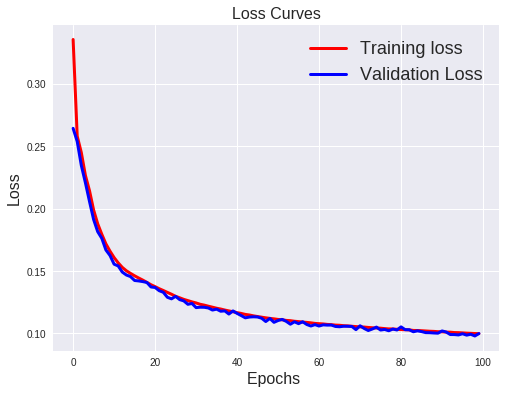

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [0]:
imgs = autoencoder.predict(x_test)

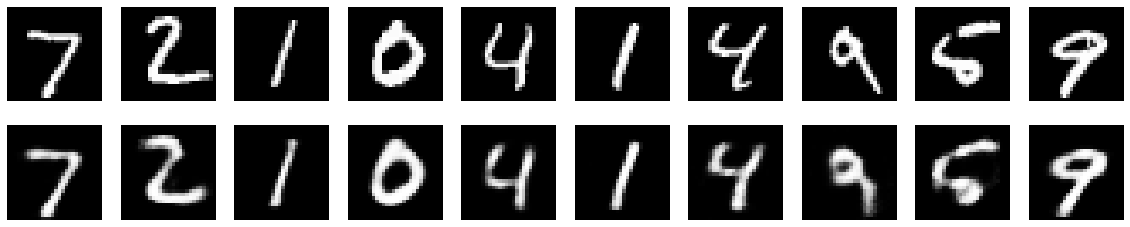

In [15]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential

In [0]:
autoencoder = Sequential()
autoencoder.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [18]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           584       
__________

In [0]:
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [21]:
history3 = autoencoder.fit(x_train, x_train,
                           epochs=50,
                           batch_size=128,
                           shuffle=True,
                           validation_data=(x_test, x_test),
                           verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 8s - loss: 0.2154 - val_loss: 0.1555
Epoch 2/50
 - 7s - loss: 0.1498 - val_loss: 0.1407
Epoch 3/50
 - 7s - loss: 0.1355 - val_loss: 0.1312
Epoch 4/50
 - 7s - loss: 0.1288 - val_loss: 0.1259
Epoch 5/50
 - 7s - loss: 0.1242 - val_loss: 0.1218
Epoch 6/50
 - 7s - loss: 0.1211 - val_loss: 0.1203
Epoch 7/50
 - 7s - loss: 0.1185 - val_loss: 0.1154
Epoch 8/50
 - 7s - loss: 0.1168 - val_loss: 0.1148
Epoch 9/50
 - 7s - loss: 0.1150 - val_loss: 0.1154
Epoch 10/50
 - 7s - loss: 0.1133 - val_loss: 0.1121
Epoch 11/50
 - 7s - loss: 0.1123 - val_loss: 0.1097
Epoch 12/50
 - 7s - loss: 0.1111 - val_loss: 0.1103
Epoch 13/50
 - 7s - loss: 0.1103 - val_loss: 0.1115
Epoch 14/50
 - 7s - loss: 0.1096 - val_loss: 0.1087
Epoch 15/50
 - 7s - loss: 0.1087 - val_loss: 0.1076
Epoch 16/50
 - 7s - loss: 0.1079 - val_loss: 0.1063
Epoch 17/50
 - 7s - loss: 0.1073 - val_loss: 0.1060
Epoch 18/50
 - 7s - loss: 0.1068 - val_loss: 0.1098
Epoch 19/50
 - 7s - los

 - 7s - loss: 0.1001 - val_loss: 0.0997
Epoch 44/50
 - 7s - loss: 0.0999 - val_loss: 0.0975
Epoch 45/50
 - 7s - loss: 0.1001 - val_loss: 0.0966
Epoch 46/50
 - 7s - loss: 0.0997 - val_loss: 0.0974
Epoch 47/50
 - 7s - loss: 0.0995 - val_loss: 0.0993
Epoch 48/50
 - 7s - loss: 0.0994 - val_loss: 0.0976
Epoch 49/50
 - 7s - loss: 0.0993 - val_loss: 0.0986
Epoch 50/50
 - 6s - loss: 0.0993 - val_loss: 0.0987


Text(0.5,1,'Loss Curves')

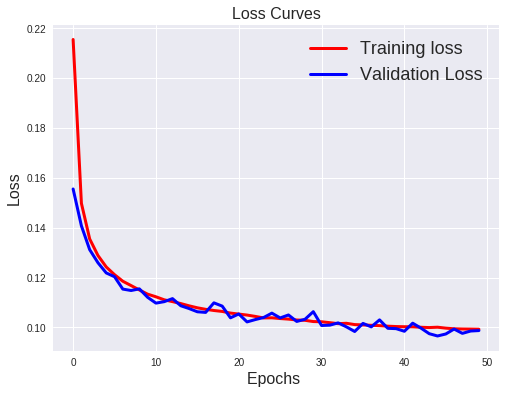

In [22]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history3.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

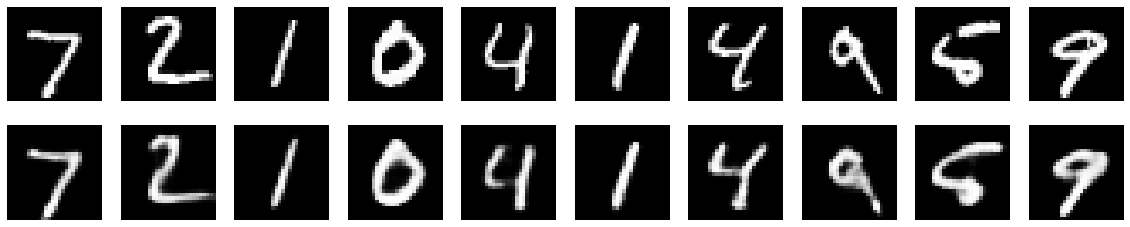

In [23]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Image Denoising

In [0]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,
                                                          scale=1.0,
                                                          size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,
                                                        scale=1.0,
                                                        size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

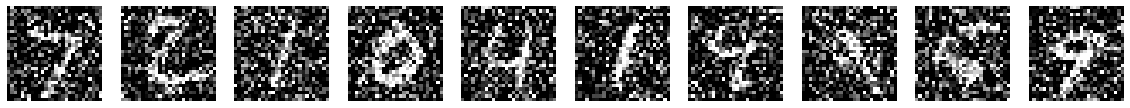

In [28]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
autoencoder = Sequential()
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [30]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
__________

In [32]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history4 = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 8s - loss: 0.1036 - val_loss: 0.1016
Epoch 2/100
 - 8s - loss: 0.1028 - val_loss: 0.1015
Epoch 3/100
 - 8s - loss: 0.1021 - val_loss: 0.1011
Epoch 4/100
 - 8s - loss: 0.1017 - val_loss: 0.0999
Epoch 5/100
 - 8s - loss: 0.1011 - val_loss: 0.1002
Epoch 6/100
 - 8s - loss: 0.1007 - val_loss: 0.0997
Epoch 7/100
 - 8s - loss: 0.1002 - val_loss: 0.0989
Epoch 8/100
 - 8s - loss: 0.0999 - val_loss: 0.0984
Epoch 9/100
 - 8s - loss: 0.0996 - val_loss: 0.0992
Epoch 10/100
 - 8s - loss: 0.0993 - val_loss: 0.0986
Epoch 11/100
 - 8s - loss: 0.0990 - val_loss: 0.0977
Epoch 12/100
 - 8s - loss: 0.0988 - val_loss: 0.0988
Epoch 13/100
 - 8s - loss: 0.0987 - val_loss: 0.0986
Epoch 14/100
 - 8s - loss: 0.0985 - val_loss: 0.0970
Epoch 15/100
 - 8s - loss: 0.0983 - val_loss: 0.0969
Epoch 16/100
 - 8s - loss: 0.0980 - val_loss: 0.0970
Epoch 17/100
 - 8s - loss: 0.0979 - val_loss: 0.0973
Epoch 18/100
 - 8s - loss: 0.0978 - val_loss: 0.0970
Epoch

 - 8s - loss: 0.0958 - val_loss: 0.0950
Epoch 44/100
 - 8s - loss: 0.0956 - val_loss: 0.0949
Epoch 45/100
 - 8s - loss: 0.0957 - val_loss: 0.0956
Epoch 46/100
 - 8s - loss: 0.0956 - val_loss: 0.0958
Epoch 47/100
 - 8s - loss: 0.0956 - val_loss: 0.0962
Epoch 48/100
 - 8s - loss: 0.0955 - val_loss: 0.0957
Epoch 49/100
 - 8s - loss: 0.0954 - val_loss: 0.0952
Epoch 50/100
 - 8s - loss: 0.0953 - val_loss: 0.0953
Epoch 51/100
 - 8s - loss: 0.0953 - val_loss: 0.0953
Epoch 52/100
 - 8s - loss: 0.0953 - val_loss: 0.0962
Epoch 53/100
 - 8s - loss: 0.0953 - val_loss: 0.0951
Epoch 54/100
 - 8s - loss: 0.0953 - val_loss: 0.0960
Epoch 55/100
 - 8s - loss: 0.0952 - val_loss: 0.0947
Epoch 56/100
 - 8s - loss: 0.0952 - val_loss: 0.0947
Epoch 57/100
 - 8s - loss: 0.0952 - val_loss: 0.0957
Epoch 58/100
 - 8s - loss: 0.0951 - val_loss: 0.0948
Epoch 59/100
 - 8s - loss: 0.0950 - val_loss: 0.0947
Epoch 60/100
 - 8s - loss: 0.0951 - val_loss: 0.0949
Epoch 61/100
 - 8s - loss: 0.0950 - val_loss: 0.0945
Epoch 

 - 8s - loss: 0.0944 - val_loss: 0.0950
Epoch 87/100
 - 8s - loss: 0.0944 - val_loss: 0.0942
Epoch 88/100
 - 8s - loss: 0.0944 - val_loss: 0.0939
Epoch 89/100
 - 8s - loss: 0.0943 - val_loss: 0.0940
Epoch 90/100
 - 8s - loss: 0.0944 - val_loss: 0.0940
Epoch 91/100
 - 8s - loss: 0.0943 - val_loss: 0.0945
Epoch 92/100
 - 8s - loss: 0.0943 - val_loss: 0.0939
Epoch 93/100
 - 8s - loss: 0.0943 - val_loss: 0.0942
Epoch 94/100
 - 8s - loss: 0.0943 - val_loss: 0.0937
Epoch 95/100
 - 8s - loss: 0.0942 - val_loss: 0.0937
Epoch 96/100
 - 8s - loss: 0.0942 - val_loss: 0.0939
Epoch 97/100
 - 8s - loss: 0.0942 - val_loss: 0.0940
Epoch 98/100
 - 7s - loss: 0.0942 - val_loss: 0.0939
Epoch 99/100
 - 7s - loss: 0.0942 - val_loss: 0.0937
Epoch 100/100
 - 8s - loss: 0.0942 - val_loss: 0.0937


Text(0.5,1,'Loss Curves')

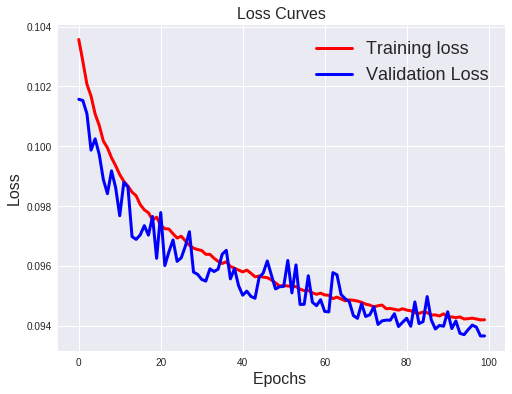

In [33]:
plt.figure(figsize=[8,6])
plt.plot(history4.history['loss'],'r',linewidth=3.0)
plt.plot(history4.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

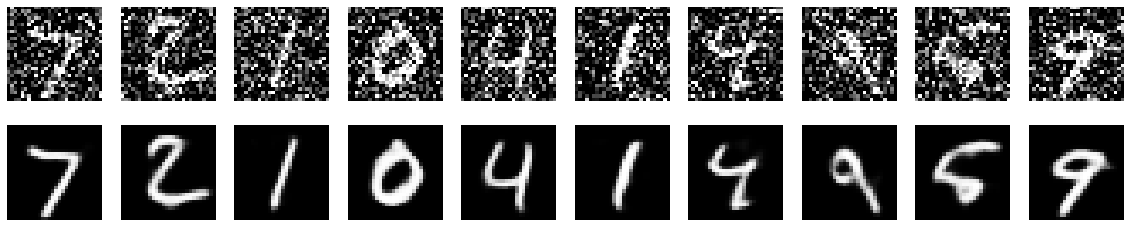

In [34]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()